In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='talk', style='white', palette='Dark2', font_scale=0.8)

In [2]:
# Loading the data

In [3]:
file_ = './main_table_of_Fourches_ligs_ERK2.pkl'
with open(file_, 'rb') as f:
    df_erk2_mols = pickle.load(f)
df_erk2_mols = df_erk2_mols.set_index('Name')
df_erk2_mols = df_erk2_mols.sort_values('pKi', ascending = False)

RDKit WARNING: [12:11:05] Enabling RDKit 2019.09.1 jupyter extensions


In [4]:
# Get the names of each one of the precomputed descriptors

In [5]:
# WHIM

In [6]:
# List of RDKit descriptors

whim_axial = [ "L1u", "L2u", "L3u", "P1u", "P2u", "G1u", "G2u", "G3u", "E1u", "E2u", "E3u", 
               "L1m", "L2m", "L3m", "P1m", "P2m", "G1m", "G2m", "G3m", "E1m", "E2m", "E3m", 
               "L1v", "L2v", "L3v", "P1v", "P2v", "G1v", "G2v", "G3v", "E1v", "E2v", "E3v", 
               "L1e", "L2e", "L3e", "P1e", "P2e", "G1e", "G2e", "G3e", "E1e", "E2e", "E3e", 
               "L1p", "L2p", "L3p", "P1p", "P2p", "G1p", "G2p", "G3p", "E1p", "E2p", "E3p", 
               "L1i", "L2i", "L3i", "P1i", "P2i", "G1i", "G2i", "G3i", "E1i", "E2i", "E3i", 
               "L1s", "L2s", "L3s", "P1s", "P2s", "G1s", "G2s", "G3s", "E1s", "E2s", "E3s"]
whim_global = ["Tu", "Tm", "Tv", "Te", "Tp", "Ti", "Ts", 
               "Au", "Am", "Av", "Ae", "Ap", "Ai", "As", 
               "Gu", "Gm", 
               "Ku", "Km", "Kv", "Ke", "Kp", "Ki", "Ks", 
               "Du", "Dm", "Dv", "De", "Dp", "Di", "Ds", 
               "Vu", "Vm", "Vv", "Ve", "Vp", "Vi", "Vs"]

rdkit_whim_names = whim_axial + whim_global

In [7]:
# USR - 3dMOMENTS

In [8]:
rdkit_USR_names = ['Ctd-Mean', 'Ctd-Sigma', 'Ctd-Skewness', 'Cst-Mean', 'Cst-Sigma',
                   'Cst-Skewness', 'Fct-Mean', 'Fct-Sigma', 'Fct-Skewness', 'Ftf-Mean',
                   'Ftf-Sigma', 'Ftf-Skewness']

In [9]:
# Extract the set of descriptors from the main data table

In [10]:
# First extract WHIM

In [11]:
d = df_erk2_mols['whim_3i60_dk_pose'].map(lambda x: list(map(np.float, x)))
df_whim_all = pd.DataFrame.from_dict(dict(zip(d.index, d.values))).T
df_whim_all.columns = rdkit_whim_names
df_whim_all.head()

,L1u,L2u,L3u,P1u,P2u,G1u,G2u,G3u,E1u,E2u,...,Dp,Di,Ds,Vu,Vm,Vv,Ve,Vp,Vi,Vs
CSAR_erk2_18,23.080,1.846,1.444,0.875,0.070,0.171,0.171,0.171,0.584,0.373,...,0.435,0.434,0.305,166.499,167.953,167.412,168.045,164.932,162.648,127.958
erk2_54,23.540,2.145,1.256,0.874,0.080,0.168,0.168,0.168,0.577,0.401,...,0.353,0.427,0.416,173.111,221.057,162.315,191.668,152.837,187.818,177.247
CSAR_erk2_20,18.375,4.232,1.178,0.773,0.178,0.168,0.168,0.170,0.560,0.450,...,0.399,0.428,0.360,219.781,249.099,214.805,231.843,206.766,221.765,186.677
CSAR_erk2_17,20.911,4.467,1.201,0.787,0.168,0.168,0.168,0.168,0.576,0.450,...,0.401,0.426,0.475,262.711,311.979,256.090,281.234,247.611,263.777,291.716
erk2_52,24.683,2.894,1.686,0.843,0.099,0.165,0.165,0.165,0.597,0.311,...,0.414,0.395,0.381,267.638,267.398,272.372,267.606,271.237,258.657,255.032


In [12]:
# Then, extract USR

In [13]:
d = df_erk2_mols['dMoments_3i60_dk_pose'].map(lambda x: list(map(np.float, x)))
df_usr_all = pd.DataFrame.from_dict(dict(zip(d.index, d.values))).T
df_usr_all.columns = rdkit_USR_names
df_usr_all.head()

,Ctd-Mean,Ctd-Sigma,Ctd-Skewness,Cst-Mean,Cst-Sigma,Cst-Skewness,Fct-Mean,Fct-Sigma,Fct-Skewness,Ftf-Mean,Ftf-Sigma,Ftf-Skewness
CSAR_erk2_18,4.684591,2.103468,-0.428104,4.708730,2.277275,-0.563049,8.893849,4.706634,-0.467899,8.604924,4.506718,-0.416431
erk2_54,4.728452,2.140652,-0.514716,4.750274,2.178588,-0.655408,9.181661,4.764043,-0.383713,8.410299,4.456988,-0.304848
CSAR_erk2_20,4.589756,1.648911,0.680528,4.607076,2.102226,0.246126,8.896938,4.276254,-0.691483,8.121057,3.751523,-0.634732
CSAR_erk2_17,4.828073,1.808073,0.605705,4.817795,2.277550,-0.319468,9.131340,4.552497,-0.617527,8.114420,4.178000,-0.511704
erk2_52,4.958588,2.162263,-0.668553,4.995313,2.140282,-0.654129,8.984859,4.704024,0.284603,8.913863,4.778408,-0.598844


In [14]:
# Concat the columns of both datafames
df_3d_all = pd.concat([df_whim_all, df_usr_all], axis=1)

In [15]:
df_3d_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87 entries, CSAR_erk2_18 to erk2_01
Columns: 126 entries, L1u to Ftf-Skewness
dtypes: float64(126)
memory usage: 86.3+ KB


In [16]:
### PCA

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

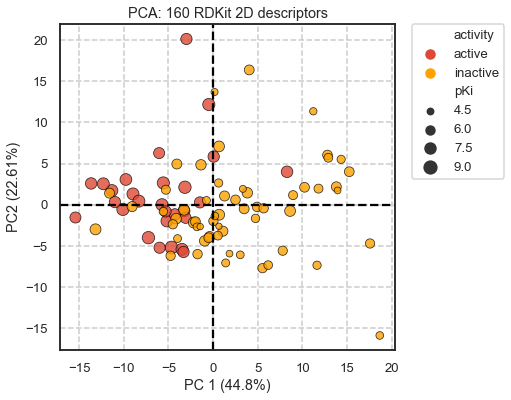

In [18]:
# Pipeline
scaler = StandardScaler()
pca = PCA(n_components=2)
pca_pipe = Pipeline(steps = [('scaler', scaler), ('pca', pca)])

X_3d = df_3d_all
pca_pipe.fit(X_3d)
# Components
components = pca_pipe.transform(X_3d).T
# Variance ratio
var_ = (pca_pipe['pca'].explained_variance_ratio_ * 100).round(2)

df_pca = df_erk2_mols[['activity', 'pKi']].copy()
df_pca['activity'] = ['active' if i else 'inactive' for i in df_pca.activity]
df_pca['pc1'] = components[0]
df_pca['pc2'] = components[1]

# Plot the PCS
fig, ax = plt.subplots(figsize=(6, 6))
ax.axvline(linestyle='--', color='k')
ax.axhline(linestyle='--', color='k')
sns.scatterplot(x='pc1', y='pc2', hue='activity', size='pKi', data=df_pca, 
                ax=ax, palette=['#df4834', '#fda200'], edgecolor='k', alpha=0.8)
ax.set(title='PCA: 160 RDKit 2D descriptors',
      xlabel=f'PC 1 ({var_[0]}%)', ylabel=f'PC2 ({var_[1]}%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid(linestyle='--')
plt.show()

In [19]:
## Feature Selection

In [20]:
### Variance Threshold

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
# first scale the variables using min_max scaler
min_max_scaler = MinMaxScaler()

X_3d_minmax = min_max_scaler.fit_transform(X_3d)
variances = X_3d_minmax.var(axis=0)
# Get the value of the first quartile
q1 = np.quantile(variances, 0.25)
# Variance filter
variance_filter = variances > q1
# Apply the filter
X_3d_var = X_3d.loc[:, variance_filter]

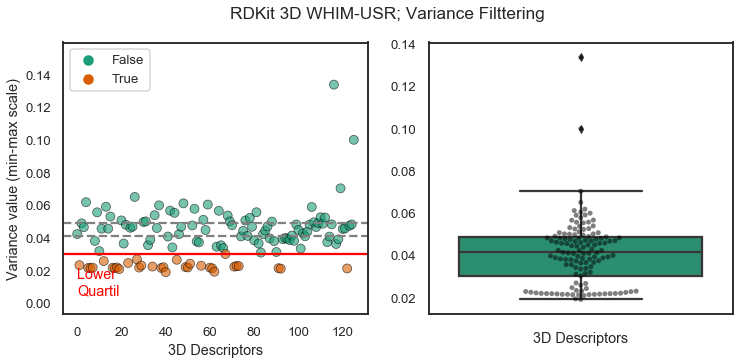

32 features were dropped.


In [23]:
# Plot variances
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
fig.suptitle('RDKit 3D WHIM-USR; Variance Filttering')
q1, q2, q3 = np.quantile(variances, [0.25, 0.5, 0.75])
n_descriptors = X_3d.shape[1]

ax1 = sns.scatterplot(x=range(0, n_descriptors), 
                      y=variances, ax=ax1, hue=(variances < q1),
                      edgecolor='k', alpha = 0.6)
ax1.set(xlabel='3D Descriptors', ylabel='Variance value (min-max scale)')
ax1.annotate('Lower\nQuartil', xy=(0, q1-.025), color='red')
ax1.axhline(q1, color='red')
ax1.axhline(q2, color='grey', linestyle='--')
ax1.axhline(q3, color='grey', linestyle='--')

ax2 = sns.boxplot(y=variances, ax=ax2)
ax2 = sns.swarmplot(y=variances, ax=ax2, color='black', alpha=0.5)
ax2.set(xlabel='3D Descriptors')
plt.show()

print(sum(variances <= q1), 'features were dropped.')

In [24]:
## Z-score Standarization

In [25]:
# Standarization
scaler = StandardScaler()
X_3d_std = pd.DataFrame(scaler.fit_transform(X_3d_var), columns=X_3d_var.columns, index=X_3d_var.index)
X_3d_std.shape

(87, 94)

In [26]:
## Correlation filtering (Pearson correlation coefficient)

#### Using the `caret` package

##### This time we are going to use the 'caret' package in R, the same package that Ash & Fourches used.

In [27]:
%load_ext rpy2.ipython

In [28]:
%%R -i X_3d_std -o cols_to_drop

corr_mtx = cor(X_3d_std, method='pearson')
cols_to_drop = caret::findCorrelation(corr_mtx, cutoff=0.9, exact=TRUE, names=TRUE)
cols_to_drop

 [1] "L1p"       "L1v"       "L1u"       "L1e"       "Fct-Sigma" "L1i"      
 [7] "Ctd-Sigma" "Ftf-Sigma" "L1m"       "L1s"       "Tv"        "Tp"       
[13] "Tu"        "Te"        "Ti"        "Fct-Mean"  "Tm"        "Ctd-Mean" 
[19] "Ftf-Mean"  "Ts"        "Ks"        "P1s"       "P2s"       "P2m"      
[25] "P2i"       "P2e"       "Kp"        "Ki"        "Kv"        "P2u"      
[31] "Km"        "Ku"        "Ke"        "P2v"       "P2p"       "P1m"      
[37] "P1p"       "P1e"       "P1v"       "P1u"       "Vv"        "Vu"       
[43] "Ve"        "Vp"        "Vi"        "Vm"        "Av"        "Ae"       
[49] "Au"        "Ap"        "Ai"        "Am"        "As"        "E1p"      
[55] "E2u"       "L3m"       "E2v"       "L3e"       "L3v"       "Di"       
[61] "L3p"       "L3i"       "E2e"       "Du"        "E1u"       "E3u"      
[67] "E3i"       "L3s"       "E3v"       "E1e"       "Dv"       


In [29]:
# Drop the identified features by caret
X_3d_corr = X_3d_std.drop(cols_to_drop, axis=1)
X_3d_corr.shape

(87, 23)

In [30]:
# Visualize correlation before and after removing features

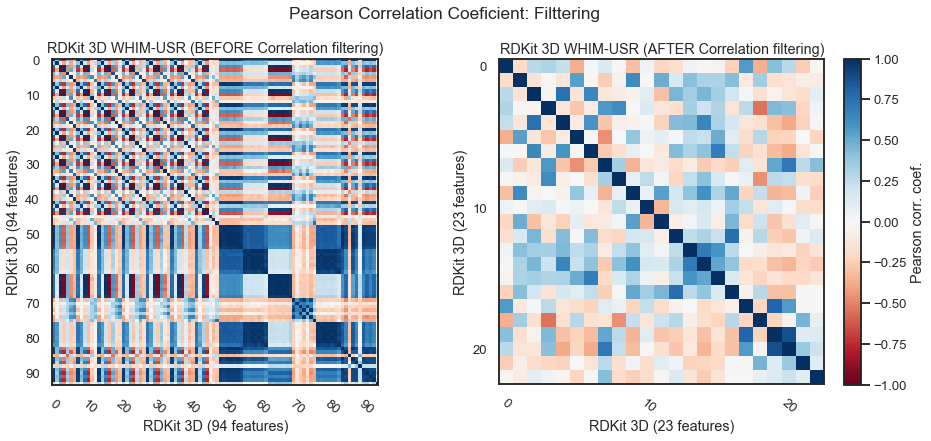

In [31]:
fig = plt.figure(figsize=(16, 6))
plt.suptitle('Pearson Correlation Coeficient: Filttering', y = 1.0)

# ALL FEATURES POST VARIANCE THR
n_init_feat = X_3d_std.shape[1]
corr_mtx_all = X_3d_std.corr(method='pearson')

plt.subplot(1, 2, 1)
plt.imshow(corr_mtx_all, cmap='RdBu', vmin=-1, vmax=1)
plt.yticks(range(0, n_init_feat, 10))
plt.xticks(range(0, n_init_feat, 10), rotation=-40)
axlabel_ = f'RDKit 3D ({n_init_feat} features)'
plt.xlabel(axlabel_); plt.ylabel(axlabel_)
plt.title('RDKit 3D WHIM-USR (BEFORE Correlation filtering)')


# FEATURES POST CORR FILTERING
n_new_feat = X_3d_corr.shape[1]
corr_mtx_post_corr = X_3d_corr.corr(method='pearson')

plt.subplot(1, 2, 2)
plt.imshow(corr_mtx_post_corr, cmap='RdBu', vmin=-1, vmax=1)
plt.yticks(range(0, n_new_feat, 10))
plt.xticks(range(0, n_new_feat, 10), rotation=-40)
axlabel_ = f'RDKit 3D ({n_new_feat} features)'
plt.xlabel(axlabel_); plt.ylabel(axlabel_)
plt.title('RDKit 3D WHIM-USR (AFTER Correlation filtering)')

cbar = plt.colorbar()
cbar.set_label('Pearson corr. coef.')
plt.show()

In [32]:
# Pearson Correlation of 68 descriptors with pKi values

In [33]:
from scipy.stats import pearsonr, spearmanr

In [34]:
rd3d_corr_values_with_pki = [pearsonr(desc, df_erk2_mols.pKi) for i, desc in X_3d_corr.iteritems()]

df_rd3d_corr_pki = pd.DataFrame({
          'descriptor': X_3d_corr.columns,
          'corr_pearson': [i[0] for i in rd3d_corr_values_with_pki],
          'p_value': [i[1] for i in rd3d_corr_values_with_pki],
          'significative': [i[1] < 0.05 for i in rd3d_corr_values_with_pki]
         })

In [35]:
corr_features_above_04 = df_rd3d_corr_pki[(df_rd3d_corr_pki.corr_pearson.abs() >= 0.4) & 
                           (df_rd3d_corr_pki.significative)]
corr_features_above_04.reset_index()

,index,descriptor,corr_pearson,p_value,significative
0,17,Vs,0.477603,2.901222e-06,True
1,19,Cst-Mean,0.538188,7.606587e-08,True
2,20,Cst-Sigma,0.447310,1.401429e-05,True


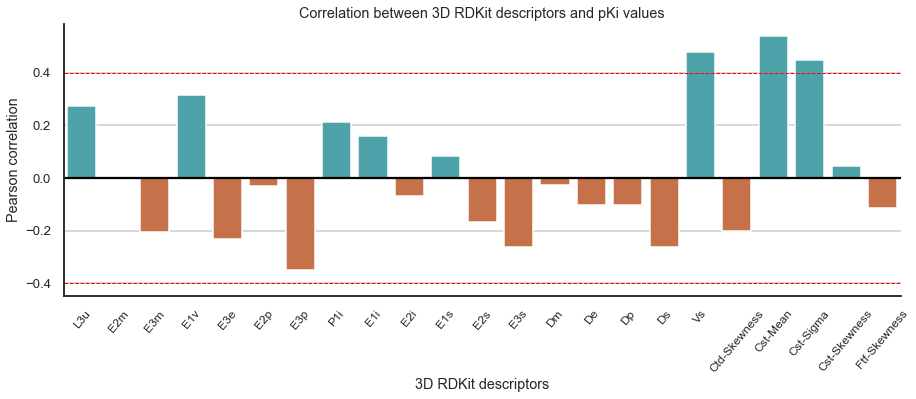

In [36]:
# plot  correlation values
color_palette = ['#3eb0ba' if i > 0 else '#da6a34' for i in df_rd3d_corr_pki.corr_pearson]
fig, ax = plt.subplots(figsize=(15, 5))

sns.barplot(x='descriptor', y = 'corr_pearson', data=df_rd3d_corr_pki, palette=color_palette, ax=ax)

ax.set_xticklabels(df_rd3d_corr_pki.descriptor, rotation=50, fontdict={'fontsize': 12})
ax.set(ylabel='Pearson correlation', xlabel='3D RDKit descriptors',
       title='Correlation between 3D RDKit descriptors and pKi values')
plt.grid(axis='y')
plt.axhline(color='k')
plt.axhline(y=0.4, linestyle='--', linewidth=1, color='red')
plt.axhline(y=-0.4, linestyle='--', linewidth=1, color='red')
sns.despine()
plt.show()

In [37]:
# Clustering

In [38]:
import scipy.spatial.distance as ssd
from scipy.cluster.hierarchy import linkage, optimal_leaf_ordering

/home/joel/anaconda3/envs/mds/lib/python3.7/site-packages/ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until


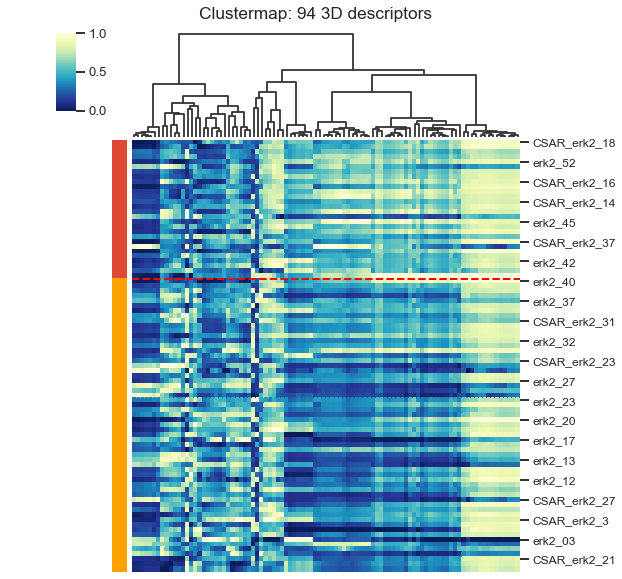

In [39]:
dist_euc_std = ssd.pdist(X_3d_std.T, 'euclidean')
dist_euc_std = ssd.squareform(dist_euc_std)
link_euc = linkage(dist_euc_std, method='average', optimal_ordering=True)

colors_rows = ['#df4834' if i >= 7.5 else '#fda200' for i in df_erk2_mols['pKi']]

clusmap = sns.clustermap(X_3d_std, cmap ='YlGnBu_r',
                standard_scale=1,
                row_cluster=False,
                col_linkage=link_euc,
                row_colors=colors_rows,
                cbar_pos=(0.1, .85, .03, .12),
                tree_kws={'linewidth': 1.8},
                figsize=(9, 9)
              )

# Number of actives
n_features = X_3d_std.shape[1]
n_actives = sum(df_erk2_mols['pKi'] >= 7.5)
ax = clusmap.ax_heatmap
ax.set_yticklabels(clusmap.ax_heatmap.get_ymajorticklabels(), fontsize = 12)
ax.hlines(y=n_actives, xmin=0, xmax=97, linewidth=2, linestyle='--', color = 'r')
clusmap.fig.suptitle(f'Clustermap: {n_features} 3D descriptors', y=1.01) 
ax.tick_params(labelbottom=False)
plt.show()

/home/joel/anaconda3/envs/mds/lib/python3.7/site-packages/ipykernel_launcher.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


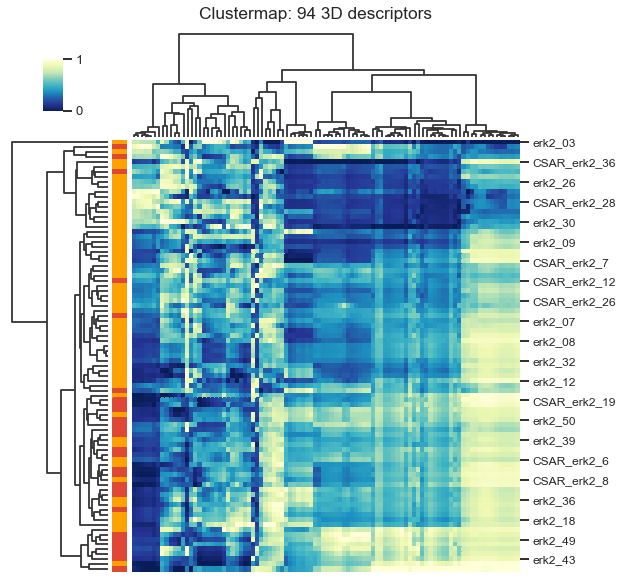

In [40]:
dist_euc_rows = ssd.pdist(X_3d_std, 'euclidean')
link_euc_rows = linkage(ssd.squareform(dist_euc_rows), method='average', optimal_ordering=True)

clusmap = sns.clustermap(X_3d_std, cmap ='YlGnBu_r',
                standard_scale=1,
                row_linkage=link_euc_rows,
                col_linkage=link_euc,
                col_cluster=True,
                row_colors=colors_rows,
                cbar_pos=(0.08, .85, .03, .08),
                tree_kws={'linewidth': 1.8},
                figsize=(9, 9)
              )

ax = clusmap.ax_heatmap
ax.set_xticklabels(clusmap.ax_heatmap.get_xmajorticklabels(), fontsize = 12)
ax.set_yticklabels(clusmap.ax_heatmap.get_ymajorticklabels(), fontsize = 12)
clusmap.fig.suptitle(f'Clustermap: {n_features} 3D descriptors', y=1.01) 
ax.tick_params(labelbottom=False)
plt.show()

In [41]:
## Paired t-test to compare Actives against Inactives

#### Supplementary Table S3

# First, let's inspect the Table S3 from Ash & Fourches (2017), and count how many 2D descriptors they report as significative.

In [42]:
# Comparing Actives against inactives given a descriptor's space

In [43]:
from scipy.stats import levene
from statsmodels.stats.weightstats import ttest_ind

In [44]:
def calc_cohens_D(sample_a, sample_b, equal_var = True, ddof = 1):
    # Get the  sample means
    m_a = np.mean(sample_a)
    m_b = np.mean(sample_b)
    diff_m = abs(m_a - m_b)
    # If equal var
    if equal_var:
        n_a = len(sample_a)
        n_b = len(sample_b)
        pool_std = np.sqrt( ((n_a - ddof)*np.var(sample_a, ddof=ddof) + 
                             (n_b - ddof)*np.var(sample_b, ddof=ddof)) / (n_a + n_b - 2))
    else:
        pool_std = np.sqrt( (np.var(sample_a, ddof=ddof) + np.var(sample_b, ddof=ddof)) / 2)
    cohen_d = diff_m / pool_std
    # Determine the size effect
    effect_size = 'small' if cohen_d <= 0.2 else 'medium' if cohen_d <= 0.5 else 'large'
    return cohen_d, effect_size

In [45]:
def calc_t_and_D_statistics(df, activity_array):
    '''
        df: A pandas tidy dataframe
        activity_array: a numpy array or pandas series with boolen values
    '''
    #Divide the main dataframe (after corr filtering) in two samples

    df_actives = df[activity_array == True]
    df_inactives = df[activity_array == False]

    # Create an empty dataframe])
    df_results = pd.DataFrame()

    # Iterate over all features
    for feature in df.columns:
        # Split the descriptor values bu molecules activity
        active_values = df_actives[feature]
        inactive_values = df_inactives[feature]

        #******* HOMOCEDASTICITY *******
        # Compute Levene test for homocedaticity
        w_statistic, l_p_value = levene(inactive_values, active_values,
                                      center='mean')
        if l_p_value > 0.05:
            homo_var = 'pooled' # H0 accepted, equal variances
            homocedastic = True
        else:
            homo_var = 'unequal'
            homocedastic = False

        # ******* t-TEST *********
        # compute the t-test
        t_statistic, t_pvalue, ddof = ttest_ind(inactive_values, active_values,
                                         alternative = 'two-sided',
                                         usevar = homo_var)

        # ******* Cohen's D value ******
        cohens_d, effect_size = calc_cohens_D(inactive_values, active_values, 
                                 equal_var = homocedastic) 
        # Append the results to the dataframe
        df_results = df_results.append({'Descriptor': feature, 
                           'levene_p_value': l_p_value, 'homocedastic': homocedastic, 
                           't_statistic': t_statistic, 't_p_value': t_pvalue,
                           'cohens_d_value':cohens_d, 'cohens_effect': effect_size},
                           ignore_index = True)

    df_results = df_results.set_index('Descriptor')
    df_results = df_results[['homocedastic', 'levene_p_value', 't_statistic',
                         't_p_value', 'cohens_d_value', 'cohens_effect']]
    df_results = df_results.sort_values(['cohens_d_value', 't_p_value'], ascending=False)
    return df_results

In [46]:
activity_array = df_erk2_mols.activity
df_3d_significance = calc_t_and_D_statistics(X_3d_corr, activity_array)

In [47]:
# Benjamin-Hechberg correction (FDR method)

In [48]:
from statsmodels.stats.multitest import multipletests

In [49]:
hb = multipletests(df_3d_significance['t_p_value'], alpha=0.05,
                   is_sorted=False, method='fdr_bh')

df_3d_significance['BH_p_value'] = hb[1]
df_3d_significance['BH_passed'] = hb[0]
df_3d_significance[df_3d_significance['BH_passed'] == True]

,homocedastic,levene_p_value,t_statistic,t_p_value,cohens_d_value,cohens_effect,BH_p_value,BH_passed
Descriptor,,,,,,,,
Cst-Mean,0.0,0.026728,-6.378780,1.268580e-08,1.357214,large,2.917735e-07,True
Vs,1.0,0.895869,-5.137188,1.750023e-06,1.178908,large,2.012527e-05,True
Cst-Sigma,1.0,0.179803,-4.128227,8.503874e-05,0.947367,large,6.519637e-04,True
L3u,1.0,0.057336,-3.525837,6.829420e-04,0.809127,large,3.926916e-03,True
Ds,1.0,0.366758,3.117819,2.486497e-03,0.715493,large,1.143788e-02,True
E2s,0.0,0.030211,2.988572,3.842053e-03,0.645740,large,1.472787e-02,True


In [50]:
# Euclidian distance matrix

# Compute the euclidean distance matrix using the remaining descriptors previously standarized (z-score)

In [51]:
import scipy.spatial.distance as ssd

In [52]:
euc_3d_mtx = ssd.pdist(X_3d_corr, metric='euclidean')
euc_3d_mtx = ssd.squareform(euc_3d_mtx)

X_3d_corr.shape

(87, 23)

In [53]:
# pKi Deltas matrix

In [54]:
# Compute a matrix with the absolute Delta pKi values between each pair of molecules
n_mols = df_erk2_mols.shape[0]
pki_vector = df_erk2_mols.pKi.values
delta_pki_matrix = np.zeros((n_mols, n_mols))
for i in range(n_mols):
    for j in range(n_mols):
        deltas = np.abs(pki_vector[i] - pki_vector)
        # Fill the matrix
        delta_pki_matrix[i, :] = deltas

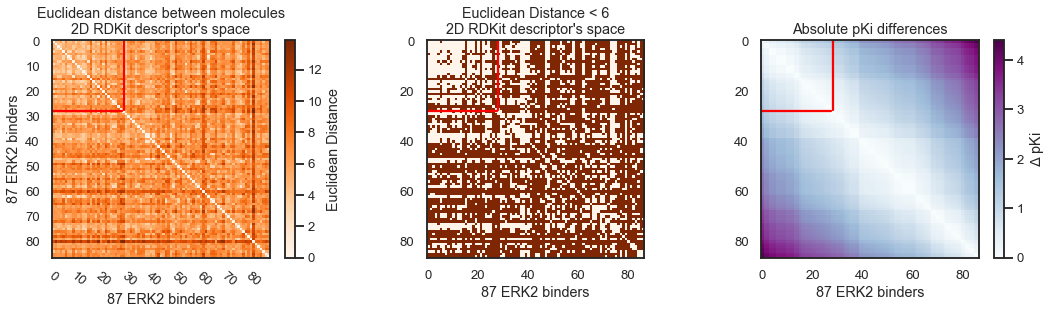

In [55]:
n_actives = df_erk2_mols.activity.sum()

fig = plt.figure(figsize=(18, 4))

plt.subplot(1,3,1)
plt.imshow(euc_3d_mtx, cmap='Oranges')
plt.yticks(range(0, n_mols, 10))
plt.xticks(range(0, n_mols, 10), rotation=-40)
xlabel_ = f'{n_mols} ERK2 binders'
plt.xlabel(xlabel_); plt.ylabel(xlabel_)
plt.title("Euclidean distance between molecules\n2D RDKit descriptor's space")

plt.axvline(x= n_actives, ymin= abs(n_mols - n_actives)/n_mols, ymax= n_mols, color='red')
plt.axhline(y= n_actives, xmin=0, xmax=(n_actives / n_mols), color='red')

cbar1 = plt.colorbar()
cbar1.set_label('Euclidean Distance')


# Euclidean distance threshold (< 6)
plt.subplot(1,3,2)
euc_dist_threshold = euc_3d_mtx < 6
# Just for visualization fill the diagonal
plt.imshow(euc_dist_threshold, cmap='Oranges_r')
plt.axvline(x= n_actives, ymin= abs(n_mols - n_actives)/n_mols, ymax= n_mols, color='red')
plt.axhline(y= n_actives, xmin=0, xmax=(n_actives / n_mols), color='red')
plt.xlabel(xlabel_)
plt.title("Euclidean Distance < 6\n2D RDKit descriptor's space")


# pKi deltas
plt.subplot(1,3,3)
# Just for visualization fill the diagonal
plt.imshow(delta_pki_matrix, cmap='BuPu')
plt.axvline(x= n_actives, ymin= abs(n_mols - n_actives)/n_mols, ymax= n_mols, color='red')
plt.axhline(y= n_actives, xmin=0, xmax=(n_actives / n_mols), color='red')
plt.xlabel(xlabel_)
plt.title('Absolute pKi differences')

cbar2 = plt.colorbar()
cbar2.set_label('$\Delta$ pKi')

plt.show()

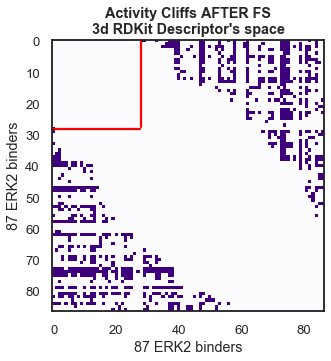

In [56]:
euclidean_mtx_dist_threshold = (euc_3d_mtx < 6) & (delta_pki_matrix > 1.5)

fig = plt.figure(figsize=(5, 5))

plt.imshow(euclidean_mtx_dist_threshold, cmap='Purples')
plt.axvline(x= n_actives, ymin= abs(n_mols - n_actives)/n_mols, ymax= n_mols, color='red')
plt.axhline(y= n_actives, xmin=0, xmax=(n_actives / n_mols), color='red')
plt.title("Activity Cliffs AFTER FS\n3d RDKit Descriptor's space", fontweight='bold')
plt.xlabel(xlabel_); plt.ylabel(xlabel_)
plt.show()

In [85]:
import sys
sys.path.append('..')
from modules.MDS import cMDS
from scipy.stats import gaussian_kde

No handles with labels found to put in legend.


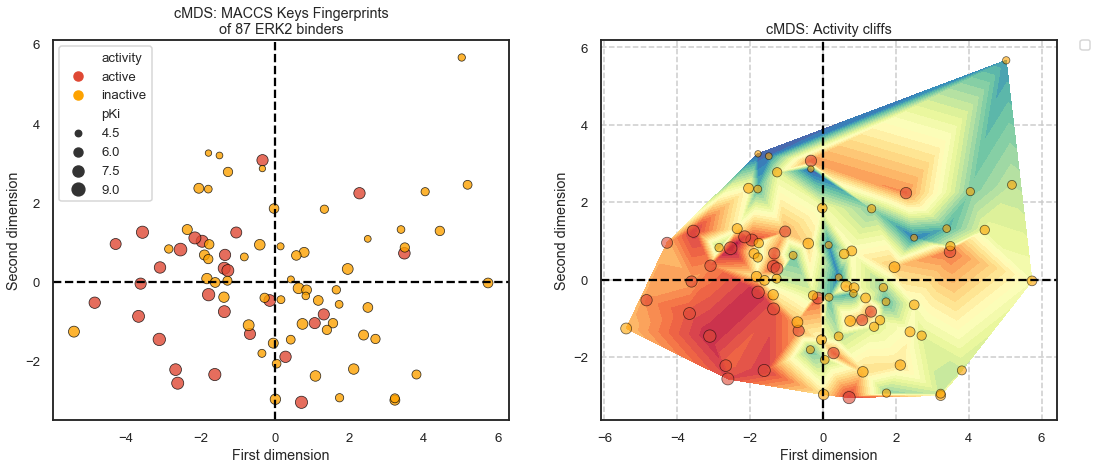

In [86]:
# Create 
# use tanimoto distance matrix to perform mds
mds_euc = cMDS(euc_3d_mtx)
dim_1 = mds_euc[0][0]
dim_2 = mds_euc[0][2]
# Create a temporal dataframe
df_mds = pd.DataFrame({'activity': df_erk2_mols.activity_label,
                       'pKi': df_erk2_mols.pKi,
                       'dim_1': dim_1, 'dim_2': dim_2})

# Plot the cMDS
# plot the figura
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))
sns.scatterplot(x='dim_1', y='dim_2', hue='activity', size='pKi', data=df_mds, 
                ax=ax1, palette=['#df4834', '#fda200'], edgecolor='k', alpha=0.8)
ax1.axvline(linestyle='--', color='k')
ax1.axhline(linestyle='--', color='k')
ax1.set(title='cMDS: MACCS Keys Fingerprints\nof 87 ERK2 binders',
      xlabel='First dimension', ylabel='Second dimension')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid(linestyle='--')


levels = 30
cmap = plt.cm.get_cmap(name='Spectral_r', lut=None)
ax2.tricontourf(df_mds['dim_1'], df_mds['dim_2'], df_mds['pKi'], levels, cmap=cmap)
sns.scatterplot(x='dim_1', y='dim_2', hue='activity', size='pKi', data=df_mds, legend=False,
                ax=ax2, palette=['#df4834', '#fda200'], edgecolor='k', alpha=0.6)
ax2.axvline(linestyle='--', color='k')
ax2.axhline(linestyle='--', color='k')
ax2.set(title='cMDS: Activity cliffs',
      xlabel='First dimension', ylabel='Second dimension')
plt.grid(linestyle='--')
plt.show()

### Circular Dendrograms

In [65]:
# pKis
pki_values = df_erk2_mols.pKi
# Activities
activity_array = df_erk2_mols.activity.values
# Distance matrix
distance_mtx = euc_3d_mtx
# Dataframe
df_to_R = X_3d_corr.copy()
#
print(f'Num. features: {df_to_R.shape[1]}')
df_to_R.index =[i.replace('CSAR_erk2', 'CSAR') for i in df_to_R.index]
df_to_R.index =[i.replace('erk2_', 'mod_') for i in df_to_R.index]

pki_values.shape

Num. features: 23


(87,)

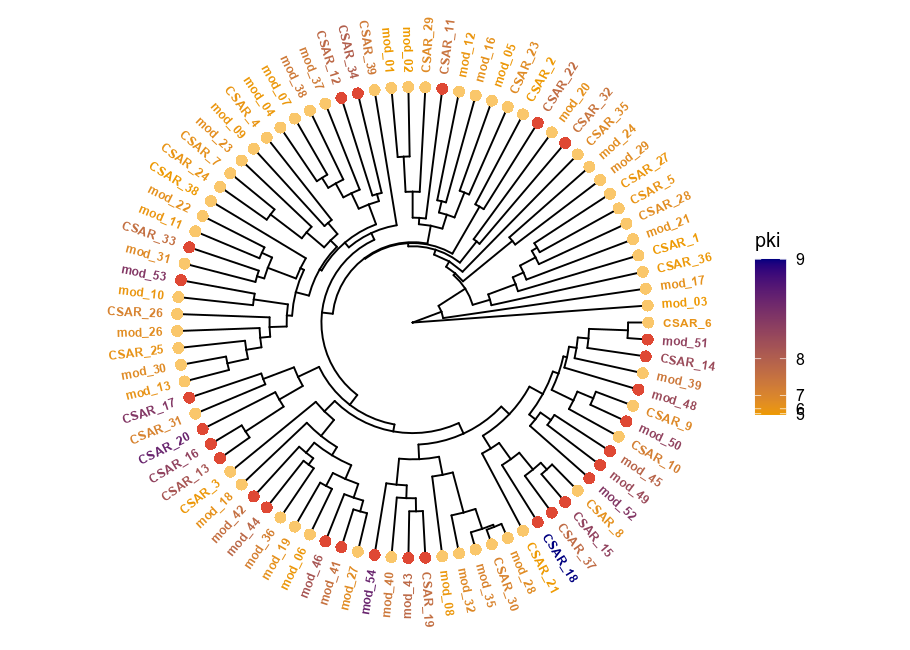

In [84]:
%%R -i df_to_R -i activity_array  -i pki_values -w 7 -h 5 --units in -r 130
library(ggtree)
library(ggplot2)
library(dendextend)

# The autors said they used fastclust for clustering and ggtree to draw the circular dendograms
df_maccs <- df_to_R

# Parse the distance matrix and perform the clustering using fastcluster
dist_matx <- vegan::vegdist(df_maccs, method = 'euclidean') #

# # Perform hierarchical clustering using fastcluster
clust <- fastcluster::hclust(dist_matx, method='average')

dendrogram <- ape::as.phylo(clust)

# Activity colors: Red = active
activity_array[activity_array == 1] <- '#df4834'
activity_array[activity_array == 0] <- '#fac76b'
pki_vector = as.vector(pki_values)

df_tree = data.frame(taxa = clust$labels, pki = pki_vector)
row.names(df_tree) <- NULL

tree <- ggtree(dendrogram, layout='circular', ladderize=T) %<+% 
        df_tree + 
        geom_tiplab(aes(color=pki), offset = 0.3, size = 2.3, fontface='bold' ) +
        scale_color_gradientn(colours= c('orange2',  'navyblue'), trans='exp') + 
        geom_tippoint(color= activity_array, shape=16, size=2.8)
tree